#### Introduction to ML and OOD 

- Resources:
    - [Scikit-learn documentation](https://scikit-learn.org/stable/modules/outlier_detection.html) 

#### For the next experiments our OOD class will be for samples with DF class and the rest will be considered In-distribution

In [19]:
import pandas as pd

groundtruth = pd.read_csv("../data/ISIC2019/ISIC_2019_Training_GroundTruth.csv")
groundtruth = groundtruth.set_index("image")
oodist = list(groundtruth.index[groundtruth.DF == 1])
indist = list(groundtruth.index[groundtruth.NV == 1])

In [20]:
len(indist), len(oodist)

(12875, 239)

In [21]:
import os
from pathlib import Path
import numpy as np
from PIL import Image

X_data = []
ood_data = []
# get the path/directory
folder_dir = "../data/ISIC2019/ISIC_2019_Training_Input/"
images = Path(folder_dir).glob("*.jpg")

for i in images:
    # image = plt.imread(i)
    image = Image.open(i).convert("RGB")
    img_resize = np.array(image.resize((224, 224), Image.Resampling.LANCZOS)).ravel()
    if i.stem in indist:
        X_data.append(img_resize)
    elif i.stem in oodist:
        ood_data.append(img_resize)
# images = list(images)
# X_array = np

In [22]:
len(X_data), len(ood_data)

(12875, 239)

In [23]:
import numpy as np

X_array = np.array(X_data[:5000])
ood_array = np.array(ood_data)

In [24]:
y_ind = np.zeros(X_array.shape[0])  # not a OOD sample
y_ood = np.ones(ood_array.shape[0])  # an OOD sample
X = np.concatenate([X_array, ood_array])
y = np.concatenate([y_ind, y_ood])
print(X.shape, y.shape)

(5239, 150528) (5239,)


explained variance ratio (first two components): [0.45037332 0.16082151]


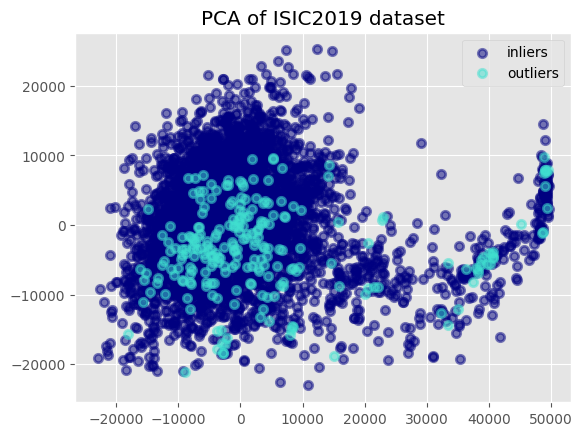

In [63]:
from sklearn.decomposition import PCA
import aux
import importlib
importlib.reload(aux)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

aux.plot_pca(X_pca, y)

plt.show()

## Isolation Forest

In [39]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, stratify=y, random_state=42
)

clf = IsolationForest(max_samples=200, random_state=0)
clf.fit(X_train)

IsolationForest(max_samples=200, random_state=0)

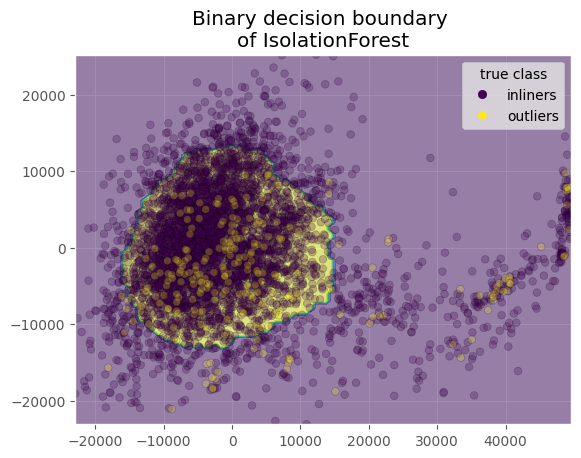

In [55]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X_pca,
    response_method="predict",
    alpha=0.5,
)

disp.ax_.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=30, alpha=0.25, edgecolor="k")
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
plt.legend(handles=handles, labels=["inliners", "outliers"], title="true class")
plt.show()

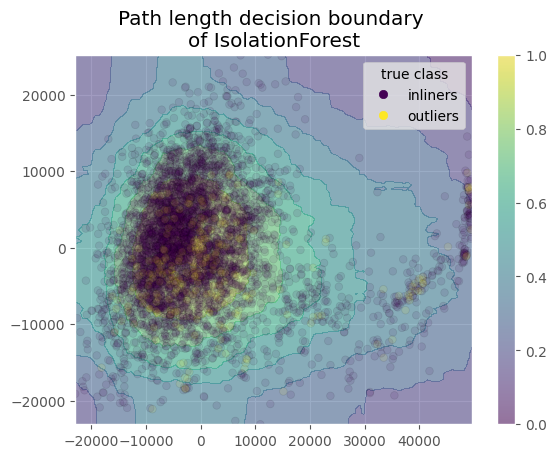

In [56]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X_pca,
    response_method="decision_function",
    alpha=0.5,
)
disp.ax_.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=30, alpha=0.1, edgecolor="k")
disp.ax_.set_title("Path length decision boundary \nof IsolationForest")
plt.legend(handles=handles, labels=["inliners", "outliers"], title="true class")
plt.colorbar(disp.ax_.collections[1])
plt.show()

### One Class SVM

In [ ]:
from sklearn.svm import OneClassSVM